In [ ]:

from scipy.signal import find_peaks,peak_widths,peak_prominences, savgol_filter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score,calinski_harabasz_score
from  sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation, Birch, OPTICS



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos_clustering = pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_clustering_v2.csv')
x = datos_clustering[['Peak_I','Peak_F','Width','Height']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled, columns = ['Peak_I','Peak_F','Width','Height'])

X, _ = train_test_split( df_normalized, test_size=0.45, random_state=42)
X 

,Peak_I,Peak_F,Width,Height
2451935,0.018344,0.990098,0.000009,0.558147
1706443,0.002064,0.994304,0.000020,0.547990
1784284,0.053898,0.992444,0.000061,0.562172
2169943,0.013301,0.969929,0.000026,0.553685
1334073,0.114800,0.914202,0.000008,0.593481
...,...,...,...,...
2356330,0.014526,0.995166,0.000008,0.563514
3511566,0.023469,0.977183,0.000182,0.551742
2229084,0.001011,0.999225,0.000013,0.638015
2768307,0.023969,0.988060,0.000016,0.560009


In [ ]:
df_normalized.quantile([0.25,0.5,0.75])

,Peak_I,Peak_F,Width,Height
0.25,0.010593,0.955907,0.000008,0.549919
0.50,0.024169,0.981938,0.000011,0.561020
0.75,0.057041,0.992303,0.000031,0.575048


In [ ]:
len(df_normalized[df_normalized.Peak_I > 0.057041])

900537

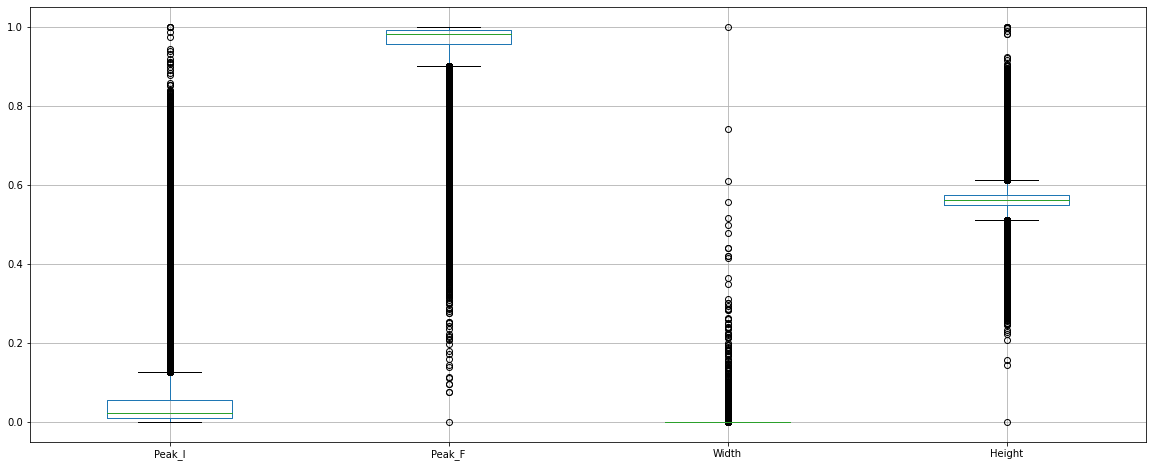

In [ ]:
df_normalized.boxplot(figsize = (20,8))

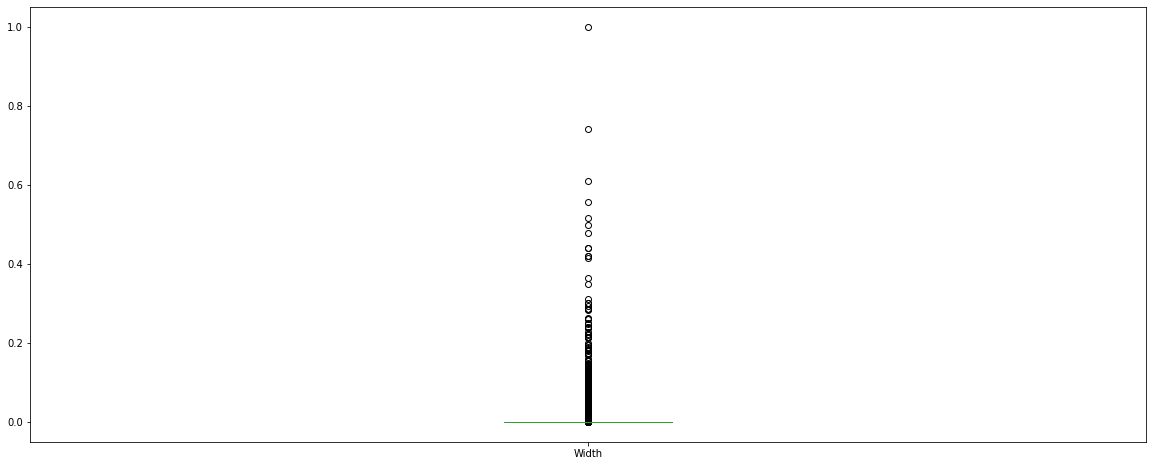

In [ ]:
df_normalized['Width'].plot.box(figsize = (20,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcacbb8da90>,
      dtype=object)

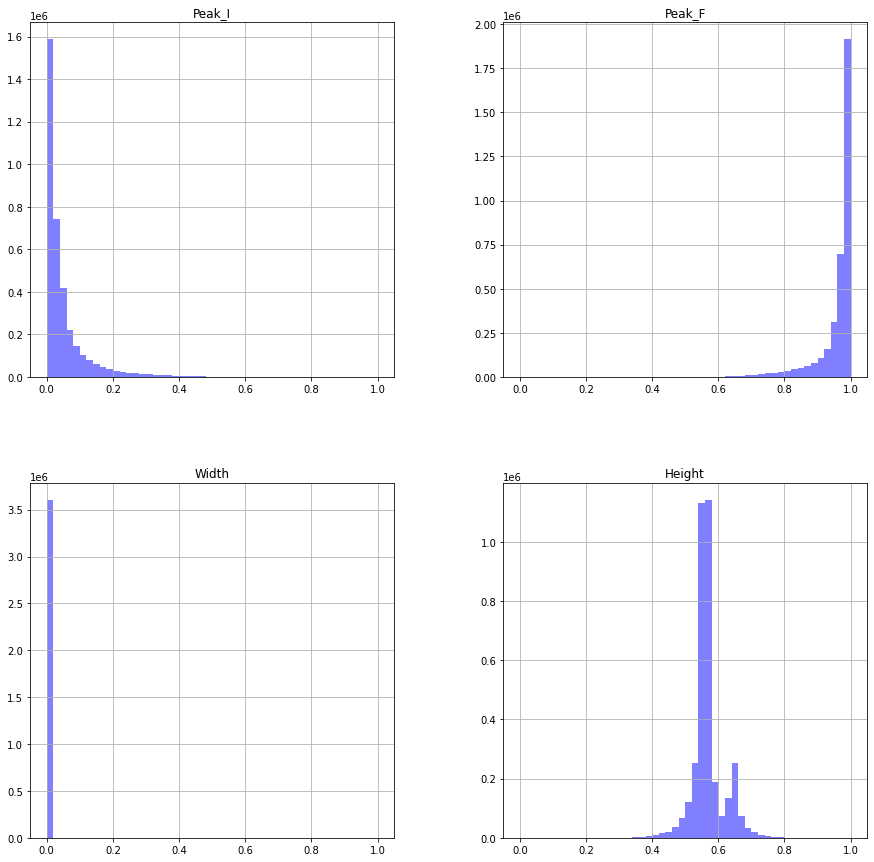

In [ ]:
df_normalized.hist(figsize=(15,15),alpha=0.5, bins=50,color = 'blue')



In [ ]:
df_normalized['Width'].value_counts()

0.000009    81
0.000012    64
0.000008    57
0.000008    50
0.000009    35
            ..
0.000011     1
0.000008     1
0.000006     1
0.000002     1
0.000000     1
Name: Width, Length: 3514911, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score,calinski_harabasz_score,v_measure_score
from  sklearn.cluster import KMeans
range_n_clusters = [3,4,5]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_normalized)
    #centers = clusterer.cluster_centers_
    cluster_labels = clusterer.labels_

    #score = silhouette_score(X[:200000], preds)
    davies = davies_bouldin_score(df_normalized,cluster_labels )
    calinski = calinski_harabasz_score(df_normalized,cluster_labels )



    print("-"*100)
    #print("For n_clusters = {}, silhouette score is {} and the david score is {} and the calinski score is {})".format(n_clusters, score, davies, calinski))
    print("For n_clusters = {}, the david score is {} and the calinski score is {})".format(n_clusters, davies, calinski))

----------------------------------------------------------------------------------------------------
For n_clusters = 3, the david score is 1.027983441726537 and the calinski score is 2075911.9608072957)
----------------------------------------------------------------------------------------------------
For n_clusters = 4, the david score is 1.019396855769277 and the calinski score is 1863609.9519960145)
----------------------------------------------------------------------------------------------------
For n_clusters = 5, the david score is 0.9405861934197628 and the calinski score is 1835465.2996496572)


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score,calinski_harabasz_score,v_measure_score
from  sklearn.cluster import KMeans
range_n_clusters = [4,5,6]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_normalized[:20000])
    #centers = clusterer.cluster_centers_
    cluster_labels = clusterer.labels_

    score = silhouette_score(df_normalized[:20000], preds)
    davies = davies_bouldin_score(df_normalized[:20000],cluster_labels )
    calinski = calinski_harabasz_score(df_normalized[:20000],cluster_labels )



    print("-"*100)
    print("For n_clusters = {}, silhouette score is {} and the david score is {} and the calinski score is {})".format(n_clusters, score, davies, calinski))
    #print("For n_clusters = {}, the david score is {} and the calinski score is {})".format(n_clusters, davies, calinski))

----------------------------------------------------------------------------------------------------
For n_clusters = 4, silhouette score is 0.5460771690124615 and the david score is 0.8809132427096771 and the calinski score is 11308.288579208205)
----------------------------------------------------------------------------------------------------
For n_clusters = 5, silhouette score is 0.4795873402283051 and the david score is 0.8823202242652807 and the calinski score is 10996.490393810353)
----------------------------------------------------------------------------------------------------
For n_clusters = 6, silhouette score is 0.46972162335605355 and the david score is 0.9041929595836296 and the calinski score is 10504.784560166678)


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit_predict(df_normalized)
cluster_labels = kmeans.labels_

In [ ]:
c = pd.Series(cluster_labels)
c.value_counts()

0    2713974
3     509489
2     239443
1     139252
dtype: int64

In [ ]:
d = pd.DataFrame(kmeans.cluster_centers_)
d = min_max_scaler.inverse_transform(d)
D = np.append(d[0] ,d[1])
D = np.append(D ,d[2])
D = np.append(D ,d[3])
D = D.reshape(4,4)
D

array([[ 3.66335201e-04, -3.80926720e-04,  2.73633692e+01,
        -2.58788902e-04],
       [ 1.22732955e-03, -7.52537024e-04,  2.52259593e+01,
        -6.61354409e-04],
       [ 5.29584085e-04, -1.12662667e-03,  2.93391280e+01,
         6.49597244e-05],
       [ 6.36996124e-04, -4.92798273e-04,  3.88043850e+01,
        -4.53916157e-04]])

In [ ]:
C = kmeans.cluster_centers_
analisis = pd.DataFrame({'pico_inicial':C[:,0],'pico_final':-1 * C[:,1], 'ancho': C[:,2], 'alto':-1* C[:,3]})
analisis

,pico_inicial,pico_final,ancho,alto
0,0.022183,-0.979197,0.000050,-0.571124
1,0.310104,-0.883669,0.000046,-0.520078
2,0.076774,-0.787505,0.000054,-0.612176
3,0.112693,-0.950439,0.000071,-0.546382


In [ ]:
b = analisis.quantile([0.25,0.5,0.75])

b['pico_final'] = b['pico_final']*-1
b['alto'] = b['alto']*-1
b

,pico_inicial,pico_final,ancho,alto
0.25,0.063126,0.957628,0.000049,0.581387
0.50,0.094734,0.917054,0.000052,0.558753
0.75,0.162046,0.859628,0.000058,0.539806


In [ ]:
3.66335201e-04 < 0.000489

True

[[2.21828667e-02 9.79196709e-01 4.98516389e-05 5.71124286e-01]
 [3.10104360e-01 8.83669308e-01 4.58851445e-05 5.20077879e-01]
 [7.67742382e-02 7.87504559e-01 5.35181498e-05 6.12176497e-01]
 [1.12693446e-01 9.50438629e-01 7.10832832e-05 5.46381616e-01]]


Text(0.5, 0, 'Width')

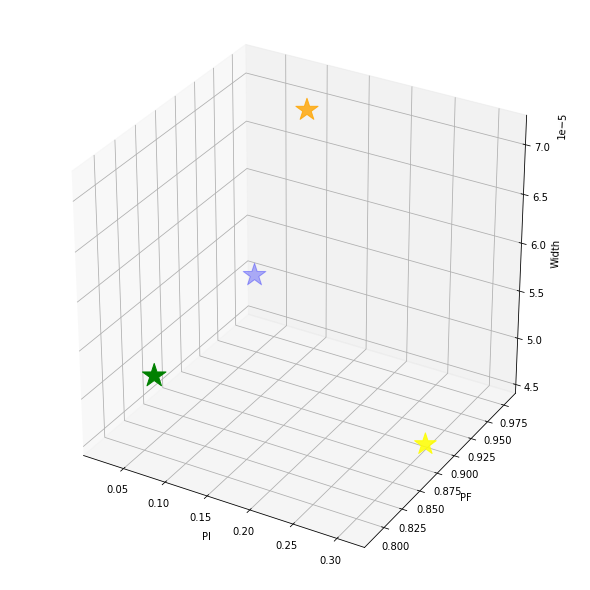

In [ ]:
%matplotlib inline
cluster_labels = kmeans.labels_

from mpl_toolkits.mplot3d import Axes3D
# Getting the cluster centers
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
C = kmeans.cluster_centers_
print(C)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c = ['blue', 'yellow','green', 'orange'], s = C[:, 3]*1000)
ax.set_xlabel('PI')
ax.set_ylabel('PF')
ax.set_zlabel('Width')

In [ ]:
C = kmeans.cluster_centers_
kmeans. predict(C)

array([0, 1, 2, 3], dtype=int32)

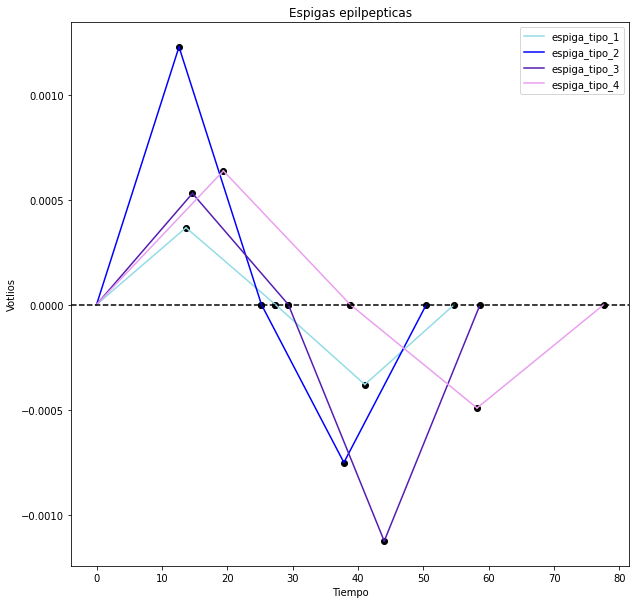

In [ ]:
%matplotlib inline
y1 = D[:, 0] #PI
x1 =  [0,0,0,0]
y2 = D[:, 1] #PF
x2 = D[:, 2] #Width



x3 = np.array(x2) *1.5
x4 = np.array(x2) *0.5
x5 = np.array(x2) *2

plt.figure(figsize=(10,10))
plt.plot(x4,y1,'ok')
plt.plot(x3,y2, 'ok')
plt.plot(x2,x1,'ok')
plt.plot(x2,x1,'ok')
plt.plot(x5,x1,'ok')

labels = ['espiga_tipo_1','espiga_tipo_2','espiga_tipo_3','espiga_tipo_4']
colors = ['#92DCE5', 'blue', '#531cb3', '#EB9FEF']
for i in range(len(y1)):
  plt.plot([x4[i],x2[i]], [y1[i],x1[i]], c = colors[i], label =labels[i] )
  plt.plot([x2[i],x3[i]], [x1[i],y2[i]], c = colors[i])
  plt.plot([x3[i],x5[i]], [y2[i],x1[i]], c = colors[i])

  plt.plot([x1[i],x4[i]], [x1[i],y1[i]], c = colors[i] )

  
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Espigas epilpepticas')
plt.xlabel('Tiempo')
plt.ylabel('Votlios')
plt.legend()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score,calinski_harabasz_score,v_measure_score


#range_n_clusters = np.linspace(0,0.5,7)
range_n_clusters = [4,5,6]
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters = n_clusters ,linkage = 'ward')
    preds = clusterer.fit_predict(X[:10000])
    #centers = clusterer.cluster_centers_
    cluster_labels = clusterer.labels_
    
    n_cluster = clusterer.n_clusters_
    score = silhouette_score(X[:10000], preds)
    davies = davies_bouldin_score(X[:10000],cluster_labels )
    calinski = calinski_harabasz_score(X[:10000],cluster_labels )

    print("-"*100)
    print("For n_clusters = {}, silhouette score is {} and the david score is {} and the calinski score is {})".format(n_clusters, score, davies, calinski))
    #print("For n_clusters = {}, the david score is {} and the calinski score is {})".format(n_cluster, davies, calinski))

----------------------------------------------------------------------------------------------------
For n_clusters = 4, silhouette score is 0.5225967410593683 and the david score is 1.107339361643748 and the calinski score is 4009.320618578046)
----------------------------------------------------------------------------------------------------
For n_clusters = 5, silhouette score is 0.491477866413628 and the david score is 1.0625202051058367 and the calinski score is 4174.740723015168)
----------------------------------------------------------------------------------------------------
For n_clusters = 6, silhouette score is 0.4860993448755409 and the david score is 1.0217644194125828 and the calinski score is 4117.194138593117)


In [ ]:
clusterer = AgglomerativeClustering(n_clusters = 4 ,linkage = 'ward')
clusterer.fit_predict(df_normalized)


# Predicive Models 

In [ ]:
import pandas as pd

In [ ]:

## Datos seizures 
datos_seizures1 = pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_seizures1.csv')
datos_seizures2= pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_seizures2.csv')
datos_seizures3 = pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_seizures3.csv')
datos_seizures4 = pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_seizures4.csv')
datos_seizures5 = pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_seizures5.csv')
datos_seizures6 = pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_seizures6.csv')

##Datos no seizures 
datos_no_seizures  = pd.read_csv('/content/drive/My Drive/Proyecto de Grado Docs/Datos_parte2.csv')

In [ ]:
dataset = pd.concat([datos_seizures1,datos_seizures2,datos_seizures3,datos_seizures4,datos_seizures5,datos_seizures6 ], axis=0)
dataset['label'].value_counts()

ictal         66331
pre_ictal     56475
interictal    41102
Name: label, dtype: int64

In [ ]:
display(dataset.isna().sum())

n_peaks            0
n_spikes           0
n_spikes1          0
n_spikes2          0
n_spikes3          0
alpha_power        0
betha_power        0
gamma_power        0
delta_power    17410
label              0
n_spikes4          0
dtype: int64

In [ ]:
dataset = pd.concat([dataset, datos_no_seizures.sample(frac =0.15, random_state=42 )], axis = 0)
dataset.drop('delta_power', axis = 1, inplace = True)
dataset

,n_peaks,n_spikes,n_spikes1,n_spikes2,n_spikes3,alpha_power,betha_power,gamma_power,label,n_spikes4
0,16,3,3,0,0,3.330612e-11,1.236702e-11,4.065387e-12,pre_ictal,0
1,14,4,4,0,0,5.900423e-11,1.099658e-11,4.843339e-12,pre_ictal,0
2,26,7,7,0,0,7.533965e-11,1.976433e-11,4.576166e-12,pre_ictal,0
3,14,3,3,0,0,2.869018e-11,1.338699e-11,4.710653e-12,pre_ictal,0
4,20,4,4,0,0,2.984004e-11,1.256106e-11,4.744372e-12,pre_ictal,0
...,...,...,...,...,...,...,...,...,...,...
329120,46,6,6,0,0,2.764937e-10,2.905847e-11,2.192764e-11,normal,0
255592,11,2,2,0,0,3.765664e-11,3.074867e-12,1.053605e-12,normal,0
337800,82,12,12,0,0,5.879063e-10,2.789075e-10,3.531602e-10,normal,0
291136,63,9,9,0,0,1.246216e-10,1.479688e-10,1.534266e-10,normal,0


In [ ]:
## Ejeutar 

#dataset = pd.get_dummies(dataset)
y = dataset['label']
dataset.drop(['label'],axis =1,inplace=True)
display(dataset)
y

,n_peaks,n_spikes,n_spikes1,n_spikes2,n_spikes3,alpha_power,betha_power,gamma_power,n_spikes4
0,16,3,3,0,0,3.330612e-11,1.236702e-11,4.065387e-12,0
1,14,4,4,0,0,5.900423e-11,1.099658e-11,4.843339e-12,0
2,26,7,7,0,0,7.533965e-11,1.976433e-11,4.576166e-12,0
3,14,3,3,0,0,2.869018e-11,1.338699e-11,4.710653e-12,0
4,20,4,4,0,0,2.984004e-11,1.256106e-11,4.744372e-12,0
...,...,...,...,...,...,...,...,...,...
329120,46,6,6,0,0,2.764937e-10,2.905847e-11,2.192764e-11,0
255592,11,2,2,0,0,3.765664e-11,3.074867e-12,1.053605e-12,0
337800,82,12,12,0,0,5.879063e-10,2.789075e-10,3.531602e-10,0
291136,63,9,9,0,0,1.246216e-10,1.479688e-10,1.534266e-10,0


0         pre_ictal
1         pre_ictal
2         pre_ictal
3         pre_ictal
4         pre_ictal
            ...    
329120       normal
255592       normal
337800       normal
291136       normal
287857       normal
Name: label, Length: 227165, dtype: object

In [ ]:
#Version 1 -----------------------------------------------------------------------------------------------------------
#dataset = pd.get_dummies(dataset)
#y = dataset[['label_ictal',	'label_interictal',	'label_normal',	'label_pre_ictal']]
#dataset.drop(['label_ictal',	'label_interictal',	'label_normal',	'label_pre_ictal'],axis =1,inplace=True)
#display(dataset)
#y

#Procedimiento 


In [ ]:
from  sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset, y,  test_size=0.2, random_state=42, stratify = y)
Y_train

9153         normal
284174       normal
17841         ictal
382624       normal
42900     pre_ictal
            ...    
11136         ictal
42891     pre_ictal
12267         ictal
46856         ictal
2072          ictal
Name: label, Length: 181732, dtype: object

In [ ]:
Y_test.value_counts()/len(Y_test)

ictal         0.291990
normal        0.278454
pre_ictal     0.248608
interictal    0.180948
Name: label, dtype: float64

In [ ]:
Y_train.value_counts()/len(Y_train)

ictal         0.291996
normal        0.278465
pre_ictal     0.248608
interictal    0.180931
Name: label, dtype: float64

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_scaled, columns = ['n_peaks', 'n_spikes', 'n_spikes1', 'n_spikes2', 'n_spikes3','alpha_power', 'betha_power', 'gamma_power', 'n_spikes4'])

In [ ]:
x_scaled_test = min_max_scaler.transform(X_test)
X_test = pd.DataFrame(x_scaled_test, columns = ['n_peaks', 'n_spikes', 'n_spikes1', 'n_spikes2', 'n_spikes3','alpha_power', 'betha_power', 'gamma_power', 'n_spikes4'])


In [ ]:
#import sklearn.preprocessing

#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(dataset)
#dataset = pd.DataFrame(x_scaled, columns = ['n_peaks', 'n_spikes', 'n_spikes1', 'n_spikes2', 'n_spikes3','alpha_power', 'betha_power', 'gamma_power', 'n_spikes4'])


In [ ]:
#from  sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(dataset, y,  test_size=0.2, random_state=42,stratify = '')
#Y_train

# Tunning a decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dic = {'criterion': ['gini','entropy'],
       'splitter':['best', 'random'],
       'max_depth': np.linspace(1,200,10),
       'min_samples_split': [int(m) for m in np.linspace(10,100,10)],
       'max_features':['auto', 'sqrt', 'log2','None']
       }

tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, dic, verbose =1,n_jobs=-1, scoring = 'f1_weighted')
clf.fit(X_train, Y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 494 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 890 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 2722 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 3598 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 4700 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 5772 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 6940 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed: 39.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid=...
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': a

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=111.55555555555556, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [ ]:
import sklearn.metrics as m

prediction_test = clf.best_estimator_.predict(X_test)
print(m.f1_score(Y_test , prediction_test, average ='weighted'))

0.5752190503102989


In [ ]:
prediction_train = clf.best_estimator_.predict(X_train)
prediction_test = clf.best_estimator_.predict(X_test)

In [ ]:
import sklearn.metrics as m
print(m.classification_report(Y_train, prediction_train))
print(m.classification_report(Y_test , prediction_test ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52901
           1       0.81      0.61      0.70     33007
           2       0.84      0.73      0.78     50499
           3       0.82      0.70      0.76     45325

   micro avg       0.88      0.78      0.83    181732
   macro avg       0.87      0.76      0.81    181732
weighted avg       0.88      0.78      0.82    181732
 samples avg       0.78      0.78      0.78    181732

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13430
           1       0.37      0.29      0.32      8095
           2       0.48      0.41      0.45     12758
           3       0.43      0.37      0.40     11150

   micro avg       0.62      0.55      0.59     45433
   macro avg       0.57      0.52      0.54     45433
weighted avg       0.60      0.55      0.58     45433
 samples avg       0.55      0.55      0.55     45433



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree no tuning 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X_train, Y_train, cv=3,)
clf.fit(X_train, Y_train)
scores

array([0.58027667, 0.58145831, 0.57979101])

In [ ]:
prediction_train  = clf.predict(X_train)
prediction_test  = clf.predict(X_test)

In [ ]:
import sklearn.metrics as m

print(m.classification_report(Y_train, prediction_train))
print(m.classification_report(Y_test , prediction_test ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52901
           1       1.00      1.00      1.00     33007
           2       1.00      1.00      1.00     50499
           3       1.00      1.00      1.00     45325

   micro avg       1.00      1.00      1.00    181732
   macro avg       1.00      1.00      1.00    181732
weighted avg       1.00      1.00      1.00    181732
 samples avg       1.00      1.00      1.00    181732

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13430
           1       0.33      0.34      0.33      8095
           2       0.47      0.45      0.46     12758
           3       0.41      0.42      0.42     11150

   micro avg       0.59      0.59      0.59     45433
   macro avg       0.55      0.55      0.55     45433
weighted avg       0.59      0.59      0.59     45433
 samples avg       0.59      0.59      0.59     45433



In [ ]:
m.roc_auc_score(Y_test,prediction_test_RF)

0.6974091192782247

# Random Forest 

In [ ]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf_RF = RandomForestClassifier(n_estimators = 72, random_state=0, criterion='gini',max_depth=100)
scores = cross_val_score(clf_RF, X_train, Y_train, cv=3,)
clf_RF.fit(X_train, Y_train)
np.mean(scores)

0.6242763926118712

In [ ]:
clf_RF.score

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=72,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)>

In [ ]:
prediction_train_RF  = clf_RF.predict(X_train)
prediction_test_RF  = clf_RF.predict(X_test)

In [ ]:
print(m.classification_report(Y_train, prediction_train_RF) )
print(m.classification_report(Y_test, prediction_test_RF) )

              precision    recall  f1-score   support

       ictal       1.00      1.00      1.00     53065
  interictal       1.00      1.00      1.00     32881
      normal       1.00      1.00      1.00     50606
   pre_ictal       1.00      1.00      1.00     45180

    accuracy                           1.00    181732
   macro avg       1.00      1.00      1.00    181732
weighted avg       1.00      1.00      1.00    181732

              precision    recall  f1-score   support

       ictal       1.00      1.00      1.00     13266
  interictal       0.43      0.34      0.38      8221
      normal       0.50      0.55      0.52     12651
   pre_ictal       0.46      0.48      0.47     11295

    accuracy                           0.62     45433
   macro avg       0.60      0.59      0.59     45433
weighted avg       0.62      0.62      0.62     45433



#Tuning Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from  sklearn.ensemble import RandomForestClassifier
#dic = { 'n_estimators': [62,80,87],
 #      'criterion': ['gini','entropy'],
  #     'max_depth': [80,100,120],
       #'min_samples_split': [int(m) for m in np.linspace(10,100,)],
       #
   #    'max_features':['auto', 'sqrt', 'log2']
       #'class_weight':['balanced', 'balanced_subsample', None]
    #   }
dic = { 'n_estimators': [87],
       'criterion': ['entropy'],
       'max_depth': [120],
       #'min_samples_split': [int(m) for m in np.linspace(10,100,)],
       #
       'max_features':['auto']
       #'class_weight':['balanced', 'balanced_subsample', None]
       }

forest = RandomForestClassifier()
clf = GridSearchCV(forest, dic, verbose =10,n_jobs=-1, scoring = 'accuracy', cv = 3)
clf.fit(X_train, Y_train)

In [ ]:
clf.cv_results_

{'mean_fit_time': array([24.43052634, 31.46495175, 24.52762739, 31.4407781 , 24.4815948 ,
        29.2308778 ]),
 'mean_score_time': array([2.60689028, 2.88287687, 2.48646426, 2.91230051, 2.4649419 ,
        2.60133092]),
 'mean_test_score': array([0.62119712, 0.62070157, 0.62125456, 0.62242217, 0.62108836,
        0.6216394 ]),
 'param_max_depth': masked_array(data=[80, 80, 100, 100, 120, 120],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[62, 80, 62, 80, 62, 80],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 80, 'n_estimators': 62},
  {'max_depth': 80, 'n_estimators': 80},
  {'max_depth': 100, 'n_estimators': 62},
  {'max_depth': 100, 'n_estimators': 80},
  {'max_depth': 120, 'n_estimators': 62},
  {'max_depth': 120, 'n_estimators': 80}],
 'rank_test_score': array([4, 6, 3, 1, 5, 2

In [ ]:
best_forest = clf.best_estimator_
best_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=87,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction_train_RF  = best_forest.predict(X_train)
prediction_test_RF  = best_forest.predict(X_test)

In [ ]:
print(m.classification_report(Y_train, prediction_train_RF) )
print(m.classification_report(Y_test, prediction_test_RF) )

              precision    recall  f1-score   support

       ictal       1.00      1.00      1.00     53065
  interictal       1.00      1.00      1.00     32881
      normal       1.00      1.00      1.00     50606
   pre_ictal       1.00      1.00      1.00     45180

    accuracy                           1.00    181732
   macro avg       1.00      1.00      1.00    181732
weighted avg       1.00      1.00      1.00    181732

              precision    recall  f1-score   support

       ictal       1.00      1.00      1.00     13266
  interictal       0.43      0.33      0.37      8221
      normal       0.50      0.55      0.52     12651
   pre_ictal       0.45      0.48      0.46     11295

    accuracy                           0.62     45433
   macro avg       0.60      0.59      0.59     45433
weighted avg       0.62      0.62      0.62     45433



# Tunning Random Forest V2

In [ ]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf_RF = RandomForestClassifier(n_estimators = 72, random_state=0, criterion='gini',max_depth=100)
scores = cross_val_score(clf_RF, X_train, Y_train, cv=3,)
clf_RF.fit(X_train, Y_train)
np.mean(scores)

In [ ]:
n_estimators =  [2,3]
criterion =  ['gini','entropy']
max_depth= [30,20,50]
       #'min_samples_split': [int(m) for m in np.linspace(10,100,)],
       #
max_features = ['auto', 'sqrt', 'log2']
       #'class_weight':['balanced', 'balanced_subsample', None]
       
       
for n_estimator in n_estimators:
  for crit in criterion:
    for mdepth in max_depth:
      for mfeatures in max_features:
        clf_RF = RandomForestClassifier(n_estimators = n_estimator , random_state=0, criterion=crit,max_depth=mdepth, max_features=mfeatures, random_state=42)
        scores = cross_val_score(clf_RF, X_train, Y_train, cv=3)
        clf_RF.fit(X_train, Y_train)
        print(( "estimator {}, crit {}, depth {}, features {}, score {}".format(n_estimator, crit, mdepth, mfeatures, np.mean(scores))))




estimator 2, crit gini, depth 30, features auto, score 0.5758974751959876
estimator 2, crit gini, depth 30, features sqrt, score 0.5758974751959876
estimator 2, crit gini, depth 30, features log2, score 0.5758974751959876
estimator 2, crit gini, depth 20, features auto, score 0.5955803139722767
estimator 2, crit gini, depth 20, features sqrt, score 0.5955803139722767
estimator 2, crit gini, depth 20, features log2, score 0.5955803139722767
estimator 2, crit gini, depth 50, features auto, score 0.5707580413435797
estimator 2, crit gini, depth 50, features sqrt, score 0.5707580413435797
estimator 2, crit gini, depth 50, features log2, score 0.5707580413435797
estimator 2, crit entropy, depth 30, features auto, score 0.5737569541728872
estimator 2, crit entropy, depth 30, features sqrt, score 0.5737569541728872
estimator 2, crit entropy, depth 30, features log2, score 0.5737569541728872
estimator 2, crit entropy, depth 20, features auto, score 0.5954592324893602
estimator 2, crit entropy,

In [ ]:
clf_RF = RandomForestClassifier(n_estimators = 3 , random_state=42, max_depth = 20)
#scores = cross_val_score(clf_RF, X_train, Y_train, cv=3)
clf_RF.fit(X_train, Y_train)
#print(np.mean(scores))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
clf_RF.feature_importances_

array([0.25100743, 0.02910103, 0.28178903, 0.00039742, 0.00092955,
       0.10639989, 0.13651269, 0.18955545, 0.00430752])

array([0.00039742, 0.00092955, 0.00430752, 0.02910103, 0.10639989,
       0.13651269, 0.18955545, 0.25100743, 0.28178903])

In [ ]:
X_train.columns

Index(['n_peaks', 'n_spikes', 'n_spikes1', 'n_spikes2', 'n_spikes3',
       'alpha_power', 'betha_power', 'gamma_power', 'n_spikes4'],
      dtype='object')

Text(0.5, 1.0, 'Importancia de los features')

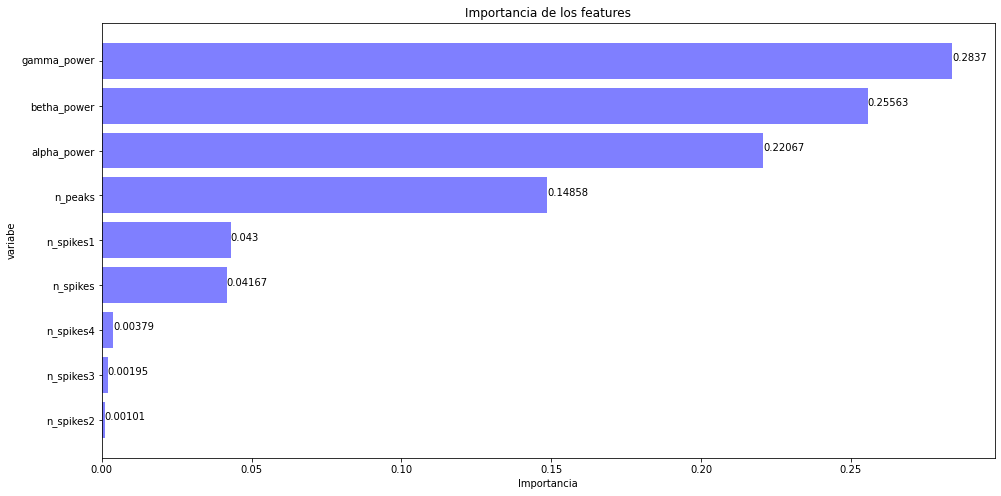

In [ ]:
values =np.array([0.14857681, 0.04167048, 0.04299547, 0.00100661, 0.00195194,
       0.22067235, 0.25562962, 0.28370476, 0.00379196])
features =X_train.columns

indices = np.argsort(values)
h  = values[indices]
plt.figure(figsize=(16,8))
rounded = [round(x,5) for x in h]
for index, value in enumerate(rounded):
    plt.text(value, index, str(value))

plt.barh(features[indices],values[indices],color = 'blue', alpha = 0.5)
plt.xlabel('Importancia')
plt.ylabel('variabe')
plt.title('Importancia de los features')

Text(0.5, 1.0, 'Importancia de los features')

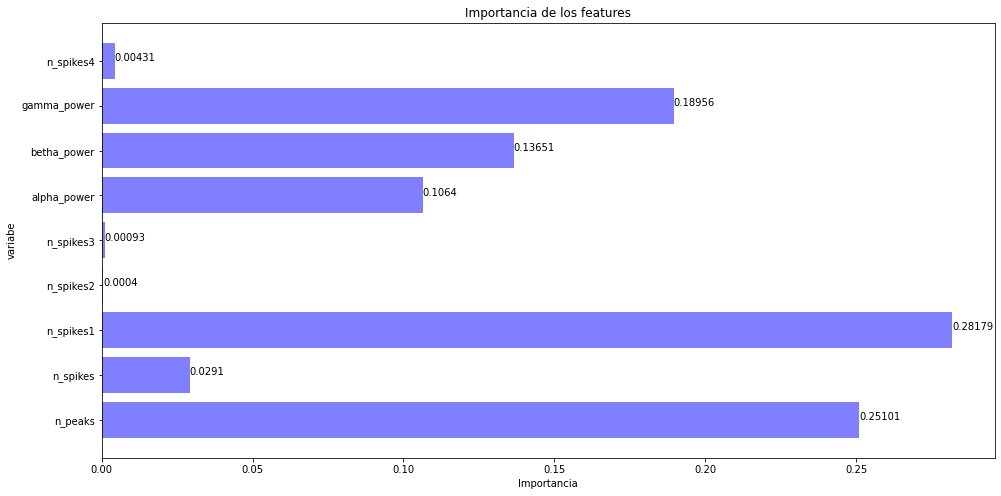

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8
))
rounded = [round(x,5) for x in clf_RF.feature_importances_]
for index, value in enumerate(rounded):
    plt.text(value, index, str(value))

plt.barh(X_train.columns,clf_RF.feature_importances_ ,color = 'blue', alpha = 0.5)
plt.xlabel('Importancia')
plt.ylabel('variabe')
plt.title('Importancia de los features')

In [ ]:
def dectree_max_depth(tree):
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)


treeObj = clf_RF.estimators_[0].tree_
print(dectree_max_depth(treeObj))

21


In [ ]:
prediction_train_RF  = clf_RF.predict(X_train)
prediction_test_RF  = clf_RF.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, prediction_train_RF) )
print(classification_report(Y_test, prediction_test_RF) )

              precision    recall  f1-score   support

       ictal       1.00      1.00      1.00     53065
  interictal       0.73      0.59      0.65     32881
      normal       0.73      0.73      0.73     50606
   pre_ictal       0.66      0.74      0.70     45180

    accuracy                           0.79    181732
   macro avg       0.78      0.77      0.77    181732
weighted avg       0.79      0.79      0.79    181732

              precision    recall  f1-score   support

       ictal       1.00      1.00      1.00     13266
  interictal       0.38      0.31      0.34      8221
      normal       0.48      0.49      0.49     12651
   pre_ictal       0.44      0.49      0.46     11295

    accuracy                           0.61     45433
   macro avg       0.58      0.57      0.57     45433
weighted avg       0.60      0.61      0.60     45433



# Gradient Boosting - Base line 


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf_RF = GradientBoostingClassifier()
scores = cross_val_score(clf_RF, X_train, Y_train, cv=3)
clf_RF.fit(X_train, Y_train)
scores

array([0.62136419, 0.61947604, 0.61945953])

In [ ]:
prediction_train_RF  = clf_RF.predict(X_train)
prediction_test_RF  = clf_RF.predict(X_test)

In [ ]:
print(m.classification_report(Y_train, prediction_train_RF) )
print(m.classification_report(Y_test, prediction_test_RF) )

              precision    recall  f1-score   support

       ictal       1.00      1.00      1.00     52901
  interictal       0.50      0.20      0.29     33007
      normal       0.46      0.66      0.54     50499
   pre_ictal       0.46      0.43      0.44     45325

    accuracy                           0.62    181732
   macro avg       0.60      0.57      0.57    181732
weighted avg       0.62      0.62      0.60    181732

              precision    recall  f1-score   support

       ictal       1.00      1.00      1.00     13430
  interictal       0.50      0.21      0.29      8095
      normal       0.46      0.65      0.54     12758
   pre_ictal       0.44      0.42      0.43     11150

    accuracy                           0.62     45433
   macro avg       0.60      0.57      0.57     45433
weighted avg       0.62      0.62      0.61     45433

